# KENYAN ELECTIONS ANALYSIS USING MACHINE LEARNING

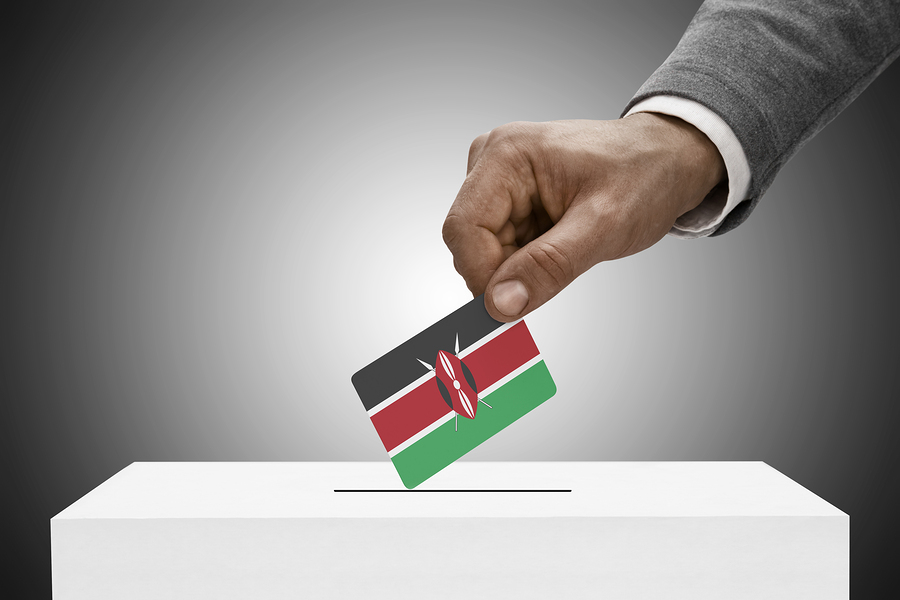

# 1. DEFINING THE QUESTION

### a) Specifying the Question

This project will entail three parts. In the first part,  we will analyze how the messages from presidential candidates affect their image and eventually their voter popularity. We seek to analyze the different phrases used by the presidential aspirants affect the common mwananchi in a positive and negative way. This analysis can give a list of phrases that should be avoided and those that can be used to boost one’s popularity.

The second aspect of this project is to analyze the qualities that can be associated with a good leader. We are going to analyze, through people’s sentiments, what are the most popular qualities that the public would wish to see in their leaders and what they want most from them. Is it good roads, reduction of commodities, more schools to be built, among others.

The last and most sensitive part is to analyze which presidential candidate will win and by what margin. This part will not be for public consumption. We intend to hand this part of the project to a company such as Ipsos so that they can integrate it in their analysis. Access to this information will be restricted to a few people.



### b) Defining the Metric for Success

### c) Understanding the context

### d). Recording the Experimental Design

- Data Scrapping
- Data Loading 
- Data Cleaning
- Data Understanding
- Data Relevance
- External Dataset Validation
- Data Preparation
- Descriptive analysis
- Modeling
- Implementation of the solution

### e) Data Relevance

The dataset to use for this project can be found by following this link:
 LINK TO BE PROVIDED


Assumptions

We shall assume the data is accurate



# 2. IMPORTING THE LIBRARIES

In [ ]:
# importing the libraries that we will nned
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import tweepy as tw
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from warnings import filterwarnings
filterwarnings('ignore')
from importlib import reload
plt=reload(plt)
%matplotlib inline

# 3. SCRAPPING DATA FROM TWITTER

In [ ]:
# Connecting to your Twitter Developer APIs

api_key=''  # used to identify and authenticate an application or user
api_secret='' # used for authentication in the most critical parts of the system where access should be limited
access_token='' # used in token-based authentication to allow an application to access an API
access_token_secret='' # used to specify the Twitter account the request is made on behalf of

In [ ]:
# Authenticating the APIs
auth = tw.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Function to get related tweets
def get_related_tweets(key_word):
    tweet_id = []
    tweet_time = []
    tweet_string = []
    retweet_count = [] 
    for tweet in tw.Cursor(api.search,q=key_word, count=50000).items(50000):
      if tweet.lang == "en":
              tweet_id.append(tweet.id)
              tweet_time.append(tweet.created_at)
              tweet_string.append(tweet.text)
              retweet_count.append(tweet.retweet_count)

    # Creating a DataFrame and storing the retrieved tweets               
    df = pd.DataFrame({'tweet_id': tweet_id, 'time': tweet_time, 'tweet': tweet_string, 'retweet_count':tweet.in_reply_to_status_id_str})
    # Writing the retreieved tweets to CSV
    df.to_csv(f"{key_word}.csv")
    return df
# Creating a list of the keywords we want to use
list_of_search = ['azimio', 'kenya kwanza', 'ruto', 'raila', 'wajackoyah', 'hustler nation', 
                  'roots party', 'baba the 5th', 'kenya 5th president', 'kenyan politics']
# Looping through the list to retrieve tweets related to the respective keyword
for i in list_of_search:
  get_related_tweets(i)

## 4. READING DATASETS AND CONCATINATING THEM INTO ONE DATAFRAME

In [ ]:
# current directory csv files
csvs = [x for x in os.listdir('.') if x.endswith('.csv')]
# stats.csv -> stats
fns = [os.path.splitext(os.path.basename(x))[0] for x in csvs]
# dictionary to store all the csv files
elections = {}
for i in range(len(fns)):
    elections[fns[i]] = pd.read_csv(csvs[i], lineterminator='\n')
# concating all the dataframes into one large dataframe
df = pd.concat((pd.read_csv(csvs[i], lineterminator='\n') for i in range(len(fns)))).reset_index(drop = True) 
print(df)

       Unnamed: 0             tweet_id                 time  \
0               0  1540065302653947908  2022-06-23 20:12:35   
1               1  1540065220479025153  2022-06-23 20:12:16   
2               2  1540065176044576769  2022-06-23 20:12:05   
3               3  1540065004879233025  2022-06-23 20:11:24   
4               4  1540064987749679106  2022-06-23 20:11:20   
...           ...                  ...                  ...   
590559       1441  1536681597600145408  2022-06-14 12:06:57   
590560       1442  1536677573668790274  2022-06-14 11:50:58   
590561       1443  1536674390091382786  2022-06-14 11:38:19   
590562       1444  1536672120792563712  2022-06-14 11:29:18   
590563       1445  1536664494478336000  2022-06-14 10:58:59   

                                                    tweet  retweet_count  \
0       Wajackoyah tells Ruto to retire with Uhuru via...            0.0   
1       Wajackoyah tells Ruto to retire with Uhuru htt...            0.0   
2       @ettie_

#5. DATA PREPARATION

### checking info of our dataset

In [ ]:
# Checking the information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590564 entries, 0 to 590563
Data columns (total 42 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       590564 non-null  object 
 1   tweet_id         584019 non-null  object 
 2   time             432887 non-null  object 
 3   tweet            590535 non-null  object 
 4   retweet_count    432887 non-null  float64
 5   conversation_id  157648 non-null  object 
 6   created_at       157648 non-null  object 
 7   date             157648 non-null  object 
 8   timezone         157648 non-null  float64
 9   place            145 non-null     object 
 10  language         157620 non-null  object 
 11  hashtags         157620 non-null  object 
 12  cashtags         157620 non-null  object 
 13  user_id          157620 non-null  object 
 14  user_id_str      157620 non-null  object 
 15  username         157620 non-null  object 
 16  name             157616 non-null  obje

In [ ]:
# checking the number of entries and attributes in our dataset
df.shape

(590564, 42)

Our dataset has a total of 590,564 entries. 
We will drop most of the columns because we do not require them in our analysis. The only columns that we will keep are Tweet_id, Date, Tweet, and Retweet_count.

### Excluding the unwanted columns from our dataset

In [ ]:
# dropping the columns that are not necessary in our analysis
# df = df.drop(['Unnamed: 0','tweet_id', 'id', 'conversation_id', 'user_id', 'user_id_str', 
# 'place','near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest'], axis=1)
# df.head()

# we will keep columns 'tweet_id','time', 'tweet', 'retweet_count'
df = df[['tweet_id','time', 'tweet', 'retweet_count']]
df.sample(20)

,tweet_id,time,tweet,retweet_count
392051,1542821214330183681,2022-07-01 10:43:36,@wuonbrevian @Milele_FM @meshmzitoh @mulamwah ...,0.0
482671,1539111523183894530,2022-06-21 05:02:37,RT @MigunaMiguna: Mr. @Karanjakibicho and the ...,348.0
509312,1539155138782408706,NaN,"@bbctms My first Test - 5th day, Oval 1972. I ...",NaN
535838,1538249232481767426,NaN,@Ola_jumy @Naija_PR @the_5th_lane Nop I still ...,NaN
416556,1542563797487026184,2022-06-30 17:40:43,Roots Party Manifesto promises to address the ...,1.0
21964,1537663684436271105,2022-06-17 05:09:25,RT @tess_njoroge: The thing I like most about ...,679.0
413772,1540265947382120448,2022-06-24 09:29:53,Azimio's meeting agenda 1.William Ruto 2.Riga...,4.0
590493,1536816020635242501,2022-06-14 21:01:06,@MosesHaabwa @WilliamsRuto @RailaOdinga So it ...,0.0
153414,1539845572177412096,2022-06-23 05:39:28,RT @citizentvkenya: Suleiman Shahbal: Over the...,28.0
560138,1537553763732291584,NaN,@MichaelLKatz Why are you at an A's game in th...,NaN


# **DATA CLEANING**

### checking for missing values

In [ ]:
# checking if there are any missing values in the dataset
df.isnull().sum()

tweet_id           6545
time             157677
tweet                29
retweet_count    157677
dtype: int64

In [ ]:
# finding the percentage of missing values for each column
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
percent_missing

tweet_id          1.11
time             26.70
tweet             0.00
retweet_count    26.70
dtype: float64

In [ ]:
# finding the percentage of missing values for the entire dataset
percentage_missing = round(df.isnull().sum().sum() * 100 / len(df),2)
percentage_missing

54.51

There seems to be many missing values. For each column, this is how we will impute the missing values:

tweet_id: We will drop the missing values since this is a unique identifier, and you cannot impute it. It should be generated from Twitter.

time: We will impute the missing values using backfill.

tweet: We will drop the missing values here, since the tweet is the sentiment shared by an individual. 

retweet_count: We will fill the missing values with '0.



In [ ]:
# dropping the missing values in tweet_id
df.dropna(subset=['tweet_id'], inplace=True)

While dropping the missing values in the tweet_id column, the tweets with missing values also got dropped. 

In [ ]:
# forward filling and backward filling the dates that are missing in our dataset
df['time'] = df['time'].ffill().bfill()

In [ ]:
# filling '0' in the missing values in our retweet_count column
df['retweet_count'] = df['retweet_count'].fillna(0)

In [ ]:
# checking to see if the missing values have been imputed
df.isnull().sum()

tweet_id         0
time             0
tweet            0
retweet_count    0
dtype: int64

Retweet_count column has some object values which should be dealt with and the dtype changed to float.
Time column should be in date time format.

In [ ]:
# checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584019 entries, 0 to 590563
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tweet_id       584019 non-null  object 
 1   time           584019 non-null  object 
 2   tweet          584019 non-null  object 
 3   retweet_count  584019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 22.3+ MB


In [ ]:
# changing the datatype of retweet_count and time to their respective datatypes
df['retweet_count'] = df['retweet_count'].astype('int')
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584019 entries, 0 to 590563
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tweet_id       584019 non-null  object        
 1   time           584019 non-null  datetime64[ns]
 2   tweet          584019 non-null  object        
 3   retweet_count  584019 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.3+ MB


#### checking duplicates

In [ ]:
# checking if we have duplicates in our 'tweet_id' column since it is out unique identifier
df['tweet_id'].duplicated().sum()

58950

The 'tweet_id' column has 58,950 duplicates. We will drop them.

In [ ]:
# dropping the duplicates in the tweet_id column
df.drop_duplicates(subset=['tweet_id'], keep='last', inplace=True)

### checking for cardinality

In [ ]:
# Number of unique values in the elections dataset
print('Cardinality of the dataset columns:\n')
for i in df.columns:
  print(f'{i:<5} : {df[i].nunique()}')

Cardinality of the dataset columns:

tweet_id : 525069
time  : 314880
tweet : 407077
retweet_count : 800


In [ ]:
# checking the shape of our final dataset
df.shape

(525069, 4)

In [ ]:
# saving the cleaned dataset to a csv file
df.to_csv('cleaned_df.csv')

## Exploratory Data Analysis

In [ ]:
clean_df = pd.read_csv('cleaned_df_amos.csv')

In [ ]:
# Creating a Function to clean the tweets further

import re

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9_]+','',str(text)) # Removing @mentions
  text = re.sub(r'#','',str(text)) # Removing the '#' symbol
  text = re.sub(r'RT[\s]+','',str(text))  # Removing RT
  text = re.sub(r'https?:\/\/\S+', '',str(text)) # Removing the hyper link
  text = re.sub(r':', '',str(text)) # Removing the ':'
  text = re.sub(r';', '',str(text)) # Removing the ';'
  text = re.sub(r'\n', '',str(text)) # Removing the '\n'
  text = re.sub(r'1', '',str(text)) # Removing the '1'
  text = re.sub(r'_', '',str(text)) # Removing the '1'

  return text

clean_df['tweet'] = clean_df['tweet'].apply(cleanTxt)

# Showing cleaned text

clean_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count
0,1,1,1543382261164302337,2022-07-02 23:53:00,Hii ndio ubaya ya kukosa degre😂😂😂. being Azi...,0
1,2,2,1543379565648773121,2022-07-02 23:42:17,Mathira MP Rigathi Gachagua says Azimio la Umo...,0
2,5,5,1543377927773081603,2022-07-02 23:35:47,Azimio la wezi,0
3,6,6,1543377130201006084,2022-07-02 23:32:37,Uhuru is the Azimio candidate. Are you visit...,0
4,7,7,1543377046105120770,2022-07-02 23:32:17,Hivyo ndivyo naingia Azimio. Kwanza hii stor...,0


In [ ]:
#!pip install textblob

In [ ]:
from textblob import TextBlob

# Creating a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


# Creating a function to get polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Creating two additional columns to check the Subjectivity and Polarity

clean_df['Subjectivity'] = clean_df['tweet'].apply(getSubjectivity)
clean_df['Polarity'] = clean_df['tweet'].apply(getPolarity)

# Checking the dataframe

clean_df.head()


,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,Subjectivity,Polarity
0,1,1,1543382261164302337,2022-07-02 23:53:00,Hii ndio ubaya ya kukosa degre😂😂😂. being Azi...,0,0.000000,0.000000
1,2,2,1543379565648773121,2022-07-02 23:42:17,Mathira MP Rigathi Gachagua says Azimio la Umo...,0,0.000000,0.000000
2,5,5,1543377927773081603,2022-07-02 23:35:47,Azimio la wezi,0,0.000000,0.000000
3,6,6,1543377130201006084,2022-07-02 23:32:37,Uhuru is the Azimio candidate. Are you visit...,0,0.000000,0.000000
4,7,7,1543377046105120770,2022-07-02 23:32:17,Hivyo ndivyo naingia Azimio. Kwanza hii stor...,0,0.362963,0.181481


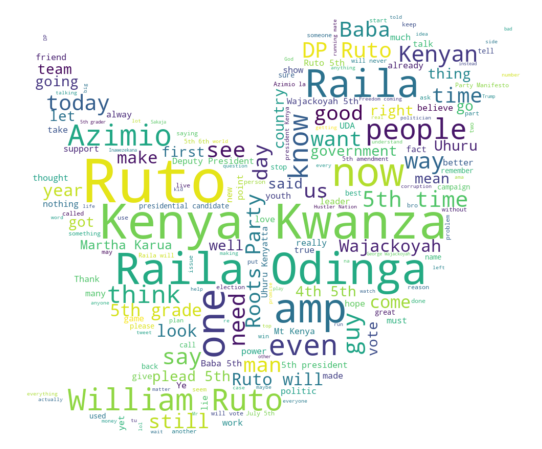

In [ ]:
# Plotting Word Cloud 

from wordcloud import WordCloud, STOPWORDS
from PIL import Image,ImageFont


stopwords = set(STOPWORDS)

mask = np.array(Image.open("twitter-logo.png"))

allWords = ' '.join([twts for twts in clean_df['tweet']])

wordCloud = WordCloud(width = 1000, height = 600, random_state = 43, max_font_size = 119,
                    mask = mask,background_color='white',stopwords = stopwords).generate(allWords)

plt.figure( figsize = (16,8))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Creating a function to compute the negative, neutral and positive sentiments in our data

def getAnalysis(score):
  if score < 0: 
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'    

# Creating another feature called Analysis to store the scores

clean_df['Analysis'] = clean_df['Polarity'].apply(getAnalysis) 

# Checking the data

clean_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,Subjectivity,Polarity,Analysis
0,1,1,1543382261164302337,2022-07-02 23:53:00,Hii ndio ubaya ya kukosa degre😂😂😂. being Azi...,0,0.000000,0.000000,Neutral
1,2,2,1543379565648773121,2022-07-02 23:42:17,Mathira MP Rigathi Gachagua says Azimio la Umo...,0,0.000000,0.000000,Neutral
2,5,5,1543377927773081603,2022-07-02 23:35:47,Azimio la wezi,0,0.000000,0.000000,Neutral
3,6,6,1543377130201006084,2022-07-02 23:32:37,Uhuru is the Azimio candidate. Are you visit...,0,0.000000,0.000000,Neutral
4,7,7,1543377046105120770,2022-07-02 23:32:17,Hivyo ndivyo naingia Azimio. Kwanza hii stor...,0,0.362963,0.181481,Positive


In [ ]:
# Printing all the Positive tweets

j = 1

sort_df = clean_df.sort_values(by='Polarity')
for i in range(0, sort_df.shape[0]):
  if (sort_df['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sort_df['tweet'][i])
    print()
    j = j+1

Streaming output truncated to the last 5000 lines.
125603)  The best option from this state capture is to vote out this remote project Azimio.. Dawa ni Kenya Kwanza

125604) Kenya KwanzaWe're told you're busy preparing your manifesto.Word has it, the perfect bullet loaded with ideas whos… 

125605)  Thank you Kapyego Ward, Marakwet East for the warm welcome and the love you have shown our DP designate Hon. Rigathi Gacha…

125606)  Thank you Kapcherop, Marakwet West in Elgeyo Marakwet County for the exceptionally jubilant reception that you accorded te…

125607)  Thank you Biretwo, Soy North, Keiyo South in Elgeyo Marakwet County. As Kenya Kwanza we have heard you loud and clear. We…

125608)  The school feeding programme at Mukarara Primary School in Dagoretti South Constituency is evidence that we can keep all…

125609)  Women are very comfortable with the incoming Government Kenya kwanzaBottomUpKiambu 

125610)  I revealed to them what Azimio La Ukora is really up to and why Kenya Kw

In [ ]:
# Printing all the Negative tweets

j = 1

sort_df = clean_df.sort_values(by='Polarity', ascending = 'False')
for i in range(0, sort_df.shape[0]):
  if (sort_df['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sort_df['tweet'][i])
    print()
    j = j+1

Streaming output truncated to the last 5000 lines.
59222)        Awuoro sana, people's eyes are so hard out here.

59223)  The Commission for University Education (CUE) must stop playing partisan politics with matters of academic integrity. Let them INVESTIGATE conman 's FAKE degree with the same speed and thoroughness they have done to 's piece of toilet paper.

59224)    As a kenyan american, we condemn what happened to you but bitterness will not solve anything. Raila will be president and Ruto will fail. You dont even like   know he is a thief. After the elections, you will be allowed to come to kenya.

59225)    we all know you hate raila. the one who gave you a job when he was prime minister and made you revelant. Without raila, nobody would know who you are. You weren’t questioning raila’s academic credentials then. Everyone can see why are you are bitter.

59226)    When you swore him in as the people's president in 208, didn't you know that he had a fake degree?

59227)     It

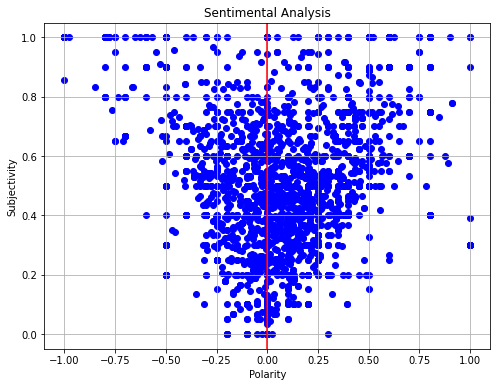

In [ ]:
# Plotting the Polarity and Subjectivity

plt.figure(figsize = (8,6))
for i in range(0,5000):
  plt.scatter(clean_df['Polarity'][i],clean_df['Subjectivity'][i], color = 'Blue')

plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid('on')
plt.axvline(x=0,ymin=0,ymax=1,color='red')
plt.show()  

In [ ]:
# Getting the Percentage of Positive tweets

pos_tweets = clean_df[clean_df.Analysis == 'Positive']
pos_tweets = pos_tweets['tweet']

print(f"We have {round((pos_tweets.shape[0]/clean_df.shape[0])*100,1)}% positive tweets")


We have 31.6% positive tweets


In [ ]:
# Getting the Percentage of Negative tweets

neg_tweets = clean_df[clean_df.Analysis == 'Negative']
neg_tweets = neg_tweets['tweet']

print(f"We have {round((neg_tweets.shape[0]/clean_df.shape[0])*100,1)}% negative tweets")

We have 15.2% negative tweets


In [ ]:
# Getting the Percentage of Neutral tweets

neutral_tweets = clean_df[clean_df.Analysis == 'Neutral']
neutral_tweets = neutral_tweets['tweet']

print(f"We have {round((neutral_tweets.shape[0]/clean_df.shape[0])*100,1)}% neutral tweets")

We have 53.2% neutral tweets


In [ ]:
# Plotting Word Cloud for Positive sentiments

stopwords = set(STOPWORDS)

font_path = 'Bright DEMO.otf'

post_Words = ' '.join([twts for twts in pos_tweets])

wordCloud = WordCloud(width = 500, height = 300, random_state = 16, max_font_size = 119,background_color='white',stopwords=STOPWORDS,font_path=font_path).generate(post_Words)

plt.figure( figsize = (14,6))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

OSError: ignored

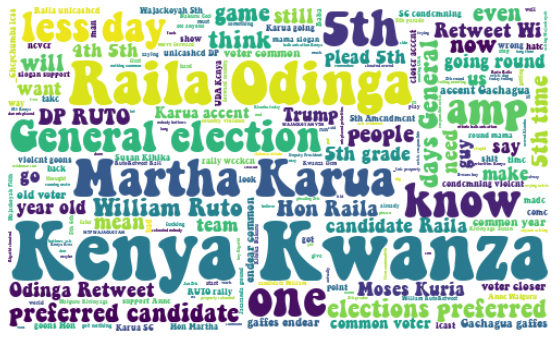

In [ ]:
# Plotting Word Cloud for Negative sentiments

stopwords = set(STOPWORDS)

font_path = 'KeeponTruckin.ttf'

negt_words = ' '.join([twts for twts in neg_tweets])

wordCloud = WordCloud(width = 500, height = 300, random_state = 67, max_font_size = 119,background_color='white',stopwords=STOPWORDS,font_path=font_path).generate(negt_words)

plt.figure( figsize = (14,6))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

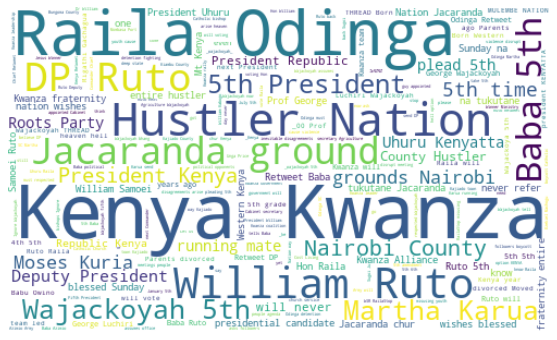

In [ ]:
# Plotting Word Cloud for Neutral sentiments

stopwords = set(STOPWORDS)

neutral_words = ' '.join([twts for twts in neutral_tweets])

wordCloud = WordCloud(width = 500, height = 300, random_state = 16, max_font_size = 119,background_color='white',stopwords=STOPWORDS).generate(neutral_words)

plt.figure( figsize = (14,6))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

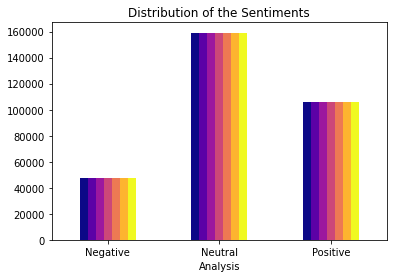

In [ ]:
# Plotting the distribution for dataset.

ax = df.groupby('Analysis').count().plot(kind='bar', title='Distribution of the Sentiments',legend=False,cmap='plasma')
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
plt.show()

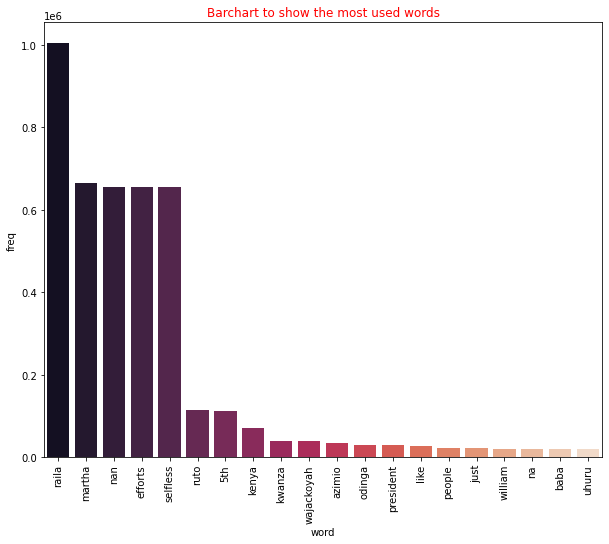

In [ ]:
# Checking the Most used individual words

from sklearn.feature_extraction.text  import CountVectorizer
import collections

cv = CountVectorizer(stop_words='english')
bow = cv.fit_transform(clean_df['tweet'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="rocket", ax=ax)
plt.xticks(rotation=90)
plt.title('Barchart to show the most used words',color='red')
plt.show()

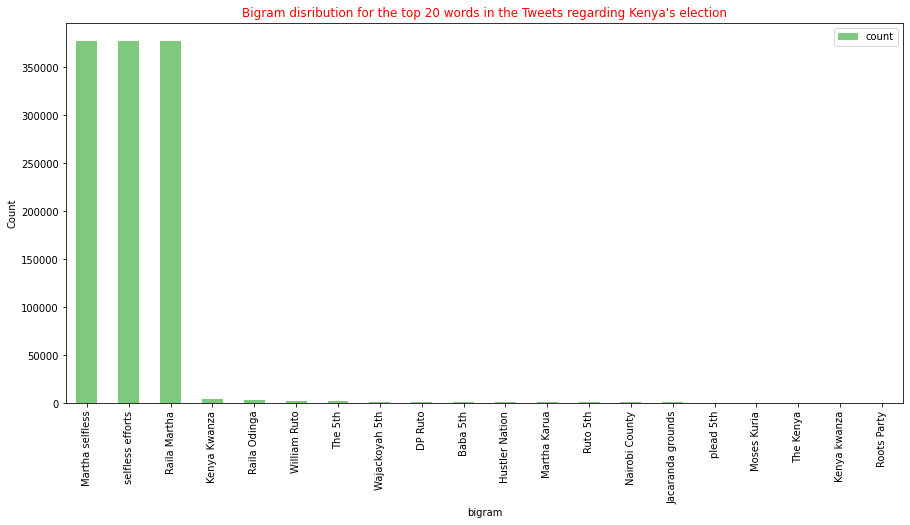

In [ ]:
# Checking for Most used two words

#Converting text descriptions into vectors using TF-IDF using Bigram

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(clean_df['tweet'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', figsize = (15,7),cmap='Accent')
plt.title("Bigram disribution for the top 20 words in the Tweets regarding Kenya's election", color = 'red')
plt.ylabel('Count')
plt.show()

## Hierarchical Clustering

In [ ]:
# We shall first proceed to sample the data using Yamane's Formulae

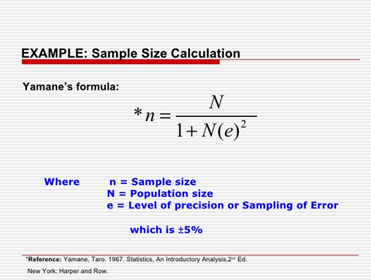

In [ ]:
# Working out

N = 525069

n = N/(1 + N*(0.05**2))

print(f"Our Sample size will be {round(n)}")

Our Sample size will be 400


In [ ]:
subset = clean_df.sample(n=400)

In [ ]:
# Encoding the Analysis columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

subset.Analysis = le.fit_transform(subset.Analysis)

subset.Analysis.head()

10975     1
269087    2
103626    1
354840    1
343614    1
Name: Analysis, dtype: int64

ValueError: ignored

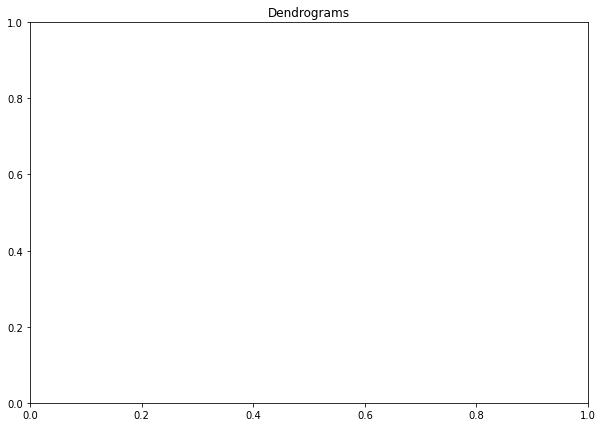

In [ ]:
# Applying the Hierachial Clustering

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(subset.Analysis, method='ward'))